# IMPORT LIBRARIES AND TRAINING ADD-ONs

In [ ]:
#@title JSON
import json as js

In [ ]:
#@title Required to save models in HDF5 
!pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Gradio
!pip install gradio --quiet
import gradio as gr

     |████████████████████████████████| 5.1 MB 32.1 MB/s 
     |████████████████████████████████| 256 kB 64.1 MB/s 
     |████████████████████████████████| 2.0 MB 53.6 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 60.1 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 212 kB 68.2 MB/s 
     |████████████████████████████████| 94 kB 1.9 MB/s 
     |████████████████████████████████| 271 kB 51.6 MB/s 
     |████████████████████████████████| 144 kB 53.8 MB/s 
     |████████████████████████████████| 11.1 MB 15.5 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 80 kB 6.1 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 62 kB 463 kB/s 
     |████████████████████████████████| 4.0 MB 56.5 MB/s 
     |███████████████████████

In [ ]:
#@title Link to/Import Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Numpy, Matplotlib, OS 
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#@title TensorFlow, Keras and others
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import MaxPool2D, GlobalAvgPool2D, AveragePooling2D
from tensorflow.keras.layers import Conv2D
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization as BatchNorm
from tensorflow import keras


In [ ]:
#@title CODE TO DRAW LEARNING CURVE 
def draw_learning_curve(history):
  plt.figure(figsize=(20,6))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.show()

In [ ]:
#@title EARLY STOPPING CODE
from tensorflow.keras.callbacks import EarlyStopping
stop =  EarlyStopping(monitor='val_loss', patience=18, restore_best_weights=True)


HOW DECAY RATES WORKS:
https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b

exponential decay: “ α = ( decayRate^(epochNumber) )*α0 “



In [ ]:
batch_size0=60

In [ ]:
#@title LEARNING RATE DECAY
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=(1020/batch_size0)*51,
    decay_rate=0.8,
    staircase=True)



In [ ]:
#@title CUSTOMIZE OPTIMIZERS (Adam,SGD)
from tensorflow.keras.optimizers import Adam, SGD
optim_sgd = SGD(lr_schedule)
optim_adam = Adam(lr_schedule)

# IMPORT oxford_flowers102 DATASET

In [ ]:
#@title Dùng TensorFlow Datasets để load bộ data oxford_flowers102
import tensorflow_datasets as tfds

(train, val, test), info = tfds.load('oxford_flowers102', 
                                      split=['train', 'validation', 'test'],
                                      shuffle_files=True,
                                      as_supervised=True, 
                                      with_info=True)

In [ ]:
#@title Thông tin chung về oxford_flowers102
info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    version=2.1.1,
    description='The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
in the United Kingdom. Each class consists of between 40 and 258 images. The images have
large scale, pose and light variations. In addition, there are categories that have large
variations within the category and several very similar categories.

The dataset is divided into a training set, a validation set and a test set.
The training set and validation set each consist of 10 images per class (totalling 1020 images each).
The test set consists of the remaining 6149 images (minimum 20 per class).',
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=102),
    }),
    total_num_examples=8

Number of flower types 102
Number of training examples: 1020
Number of validation examples: 1020
Number of test examples: 6149

Flower types full list:
['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion'

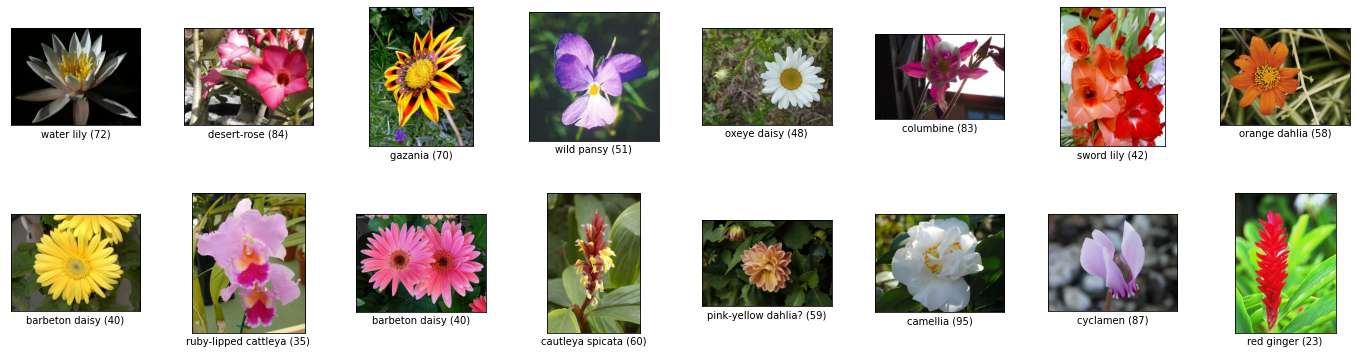

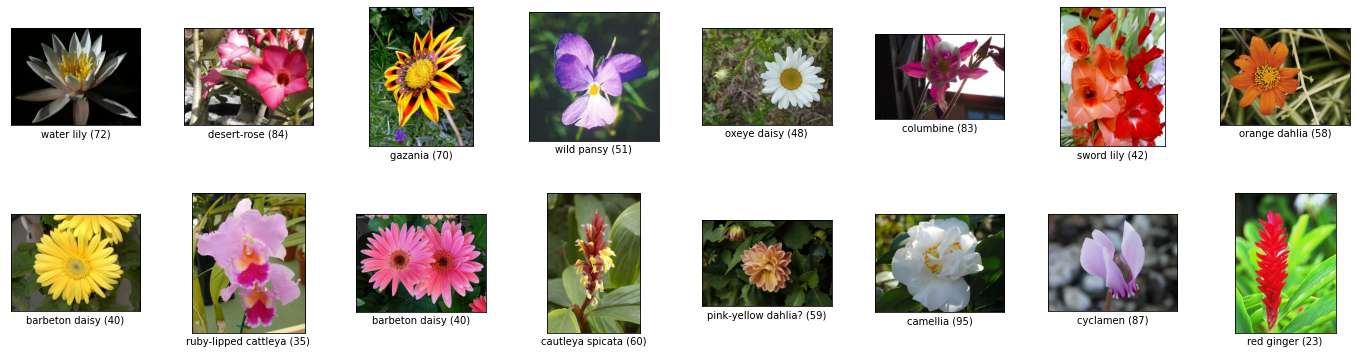

In [ ]:
#@title In ra Số lượng các loại hoa; Số example trong các tập train, val, test; và Tên của từng loại hoa; Hình ảnh vài example trong tập train
print(f"Number of flower types {info.features['label'].num_classes}")
print(f"Number of training examples: {tf.data.experimental.cardinality(train)}")
print(f"Number of validation examples: {tf.data.experimental.cardinality(val)}")
print(f"Number of test examples: {tf.data.experimental.cardinality(test)}\n")

print('Flower types full list:')
print(info.features['label'].names)

tfds.show_examples(train, info, rows=2, cols=3)

In [ ]:
#@title In danh sách tên của 102 loại hoa và lưu vào file json
print(info.features['label'].names)

jsonString = js.dumps(info.features['label'].names)
jsonFile = open("flower_names.json", "w")
jsonFile.write(jsonString)
jsonFile.close()

['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'ca

In [ ]:
#@title Lưu danh sách tên vào file txt
f = open("flower_names.txt", "w")
f.write(info.features['label'].names[0])

i=1
while i<102:
  f.write(" \n")
  f.write(info.features['label'].names[i])
  i+=1
f.close()


# DATA PREPROCESSING

In [ ]:
from tensorflow import cast, float32
from tensorflow.data.experimental import AUTOTUNE
from tensorflow import one_hot 
from tensorflow.image import resize

def preprocess_data(image, label):
  """
  Normalizes images: `uint8` -> `float32`.
  One hot encoding labels
  Resize to (100, 100)
  """
  return resize(cast(image, float32) / 255., [100, 100]), one_hot(label, 102)



In [ ]:
train_data = train.map(
    preprocess_data, num_parallel_calls=AUTOTUNE)
train_data = train_data.cache()
train_data = train_data.shuffle(info.splits['train'].num_examples)
train_data = train_data.batch(batch_size0)
train_data = train_data.prefetch(AUTOTUNE)

In [ ]:
val_data = val.map(
    preprocess_data, num_parallel_calls=AUTOTUNE)
val_data = val_data.batch(batch_size0)
val_data = val_data.cache()
val_data = val_data.prefetch(AUTOTUNE)

In [ ]:
test_data = test.map(
    preprocess_data, num_parallel_calls=AUTOTUNE)
test_data = test_data.batch(batch_size0)
test_data = test_data.cache()
test_data = test_data.prefetch(AUTOTUNE)

# MODEL BUILDING

In [ ]:

model4=Sequential()
model4.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(100,100,3)))
model4.add(Conv2D(32, 3, padding='valid', activation='relu'))
model4.add(BatchNorm())
model4.add(MaxPool2D())

model4.add(Conv2D(128, 3, padding='same', activation='relu'))
model4.add(Conv2D(128, 3, padding='valid', activation='relu'))
model4.add(BatchNorm())
model4.add(MaxPool2D())

model4.add(Conv2D(256, 3, padding='same', activation='relu'))
model4.add(Conv2D(256, 3, padding='valid', activation='relu'))
model4.add(BatchNorm())
model4.add(MaxPool2D())

model4.add(GlobalAvgPool2D()) 

model4.add(Dense(32))
model4.add(Activation("relu"))
model4.add(Dropout(0.35))

model4.add(Dense(64))
model4.add(Activation("relu"))
model4.add(Dropout(0.35))

model4.add(Dense(128))
model4.add(Activation("relu"))
model4.add(Dropout(0.35))

model4.add(Dense(512))
model4.add(Activation("relu"))
model4.add(Dropout(0.35))

model4.add(Dense(170))
model4.add(Activation("relu"))
model4.add(Dropout(0.35))

model4.add(Dense(102, activation='softmax'))

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path4 = "training_4/cp-{epoch:04d}.ckpt"
checkpoint_dir4 = os.path.dirname(checkpoint_path4)
#batch_size4= 1020
# có 6149 images, 6149=11*53*13; 559=13*43
# Create a callback that consists of earlystopping and checkpoint
ESCP_callback = [
    stop,
    tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path4, 
    verbose=1, 
    save_weights_only=True,
    save_freq= 'epoch'),
]


In [ ]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model4.save_weights(checkpoint_path4.format(epoch=0))

In [ ]:
history5=model4.fit(train_data,
           validation_data=val_data,
           batch_size=batch_size0,
           epochs=1000,
           callbacks = [ESCP_callback]
           )

Epoch 1/1000
17/17 [==============================] - ETA: 0s - loss: 4.6834 - accuracy: 0.0069
Epoch 1: saving model to training_4/cp-0001.ckpt
17/17 [==============================] - 3s 139ms/step - loss: 4.6834 - accuracy: 0.0069 - val_loss: 4.6248 - val_accuracy: 0.0098
Epoch 2/1000
17/17 [==============================] - ETA: 0s - loss: 4.6225 - accuracy: 0.0147
Epoch 2: saving model to training_4/cp-0002.ckpt
17/17 [==============================] - 2s 125ms/step - loss: 4.6225 - accuracy: 0.0147 - val_loss: 4.6218 - val_accuracy: 0.0157
Epoch 3/1000
17/17 [==============================] - ETA: 0s - loss: 4.5825 - accuracy: 0.0127
Epoch 3: saving model to training_4/cp-0003.ckpt
17/17 [==============================] - 2s 124ms/step - loss: 4.5825 - accuracy: 0.0127 - val_loss: 4.5967 - val_accuracy: 0.0176
Epoch 4/1000
17/17 [==============================] - ETA: 0s - loss: 4.5364 - accuracy: 0.0108
Epoch 4: saving model to training_4/cp-0004.ckpt
17/17 [====================

In [ ]:
model4.save('model_60_train_goodfirst120epochs.h5')

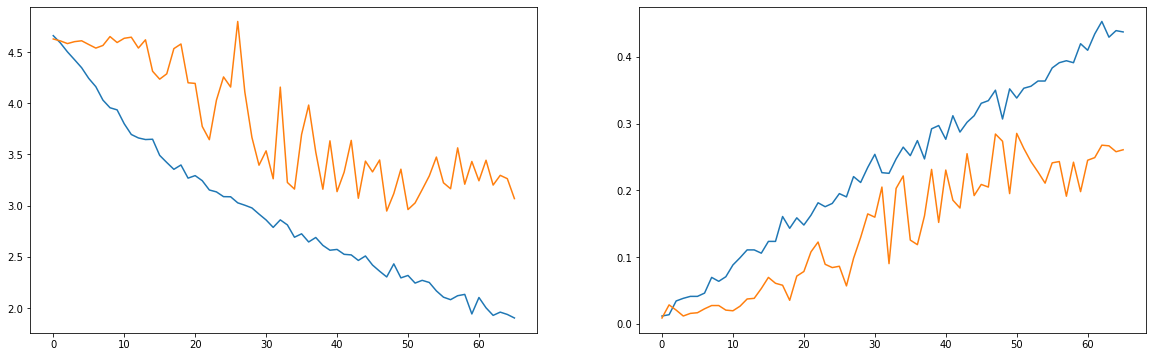

In [ ]:
draw_learning_curve(history4)

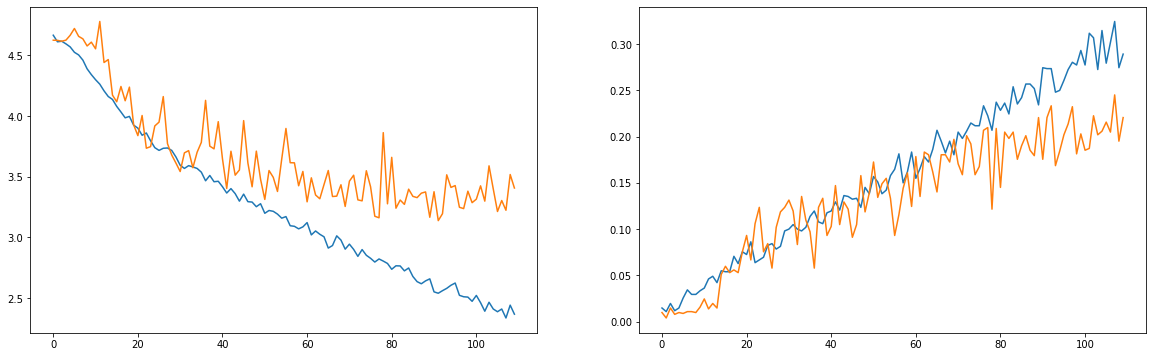

In [ ]:
draw_learning_curve(history4)

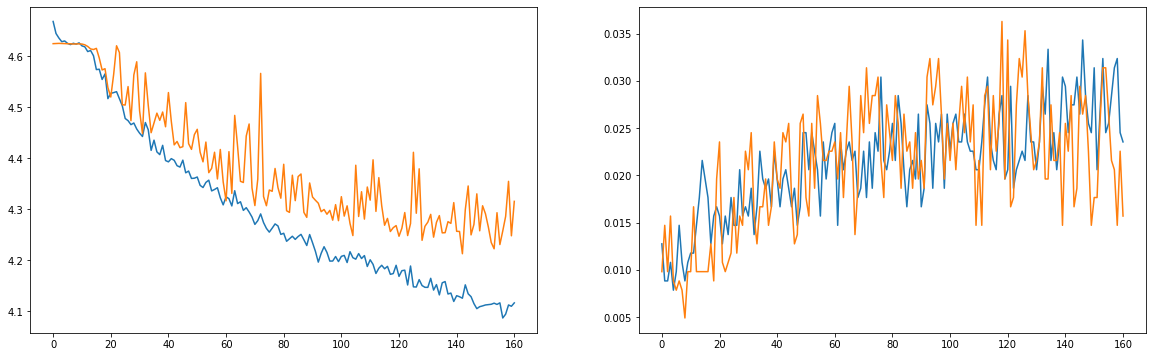

In [ ]:
draw_learning_curve(history4)

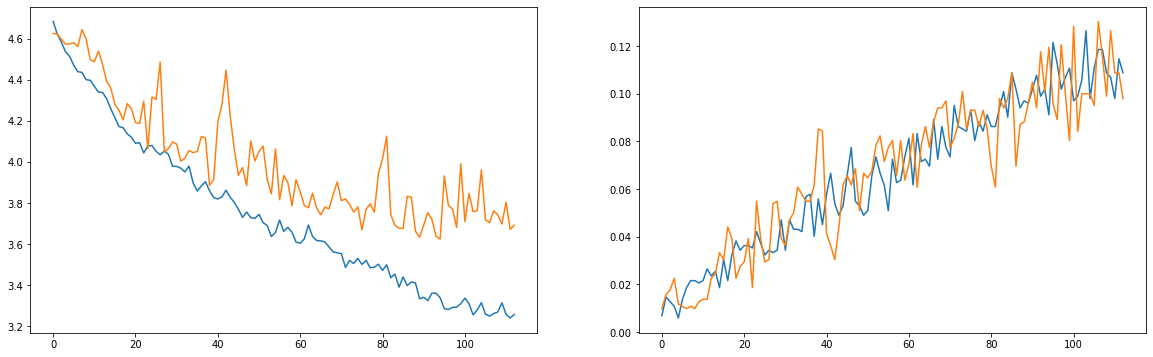

In [ ]:
draw_learning_curve(history5)

# GRADIO - USER INTERFACE

In [ ]:
#load tạm 1 model đã train để dùng build gradio

gr_model=tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJ/model_11jun.h5")

In [ ]:
with open('/content/flower_names.txt') as f:
    labels = f.readlines()

In [ ]:
def image_to_output (input_img):
  #gr_img0 = image.load_img(input_img, target_size=(100,100,3))
  #gr_img0 = image.img_to_array(gr_img0)

  gr_img=[]
  #gr_img.append(gr_img0)
  gr_img.append(input_img)

  x_test=np.asarray(gr_img)/255.

  prediction = gr_model.predict(x_test,batch_size=1).flatten()
  confidences = {labels[i]: float(prediction[i]) for i in range(102)}
  return confidences

In [ ]:
import gradio as gr

gr.Interface(fn=image_to_output, 
             inputs=gr.inputs.Image(shape=(100, 100)),
             outputs=gr.outputs.Label(num_top_classes=3),
             ).launch()

In [ ]:
gr_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 conv2d_21 (Conv2D)          (None, 98, 98, 32)        9248      
                                                                 
 batch_normalization_10 (Bat  (None, 98, 98, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 49, 49, 256)       73984     
                                                                 
 conv2d_23 (Conv2D)          (None, 47, 47, 256)      